In [35]:
# https://www.insightbig.com/post/an-algo-trading-strategy-which-made-8-371-a-python-case-study

In [36]:
# IMPORTING PACKAGES

import pandas as pd
import requests
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math 

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

In [37]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati = dati[['Date', 'Close', 'High', 'Low']]
dati = dati.rename(columns = {'Date':'Timestamp', 'Close': 'close', 'High': 'high', 'Low': 'low'})
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati['Timestamp'] = dati['Timestamp'].dt.strftime('%Y-%m-%d')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'], format='%Y-%m-%d')
dati

,Timestamp,close,high,low
0,2014-09-17,355.957367,361.468506,351.586884
1,2014-09-18,328.539368,355.505402,319.789459
2,2014-09-19,307.761139,330.936707,298.921021
3,2014-09-20,318.758972,329.978180,303.931244
4,2014-09-21,310.632446,321.504517,306.502197
...,...,...,...,...
3503,2024-04-20,59876.710938,61440.464844,56170.074219
3504,2024-04-21,60956.074219,61376.257812,59247.250000
3505,2024-04-22,60919.242188,61639.593750,60245.773438
3506,2024-04-23,62729.296875,63113.457031,60496.617188


In [38]:
data_inizio = '2014-09-17'
data_fine = '2024-04-24'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1].reset_index(drop=True)
dati

,Timestamp,close,high,low
0,2014-09-17,355.957367,361.468506,351.586884
1,2014-09-18,328.539368,355.505402,319.789459
2,2014-09-19,307.761139,330.936707,298.921021
3,2014-09-20,318.758972,329.978180,303.931244
4,2014-09-21,310.632446,321.504517,306.502197
...,...,...,...,...
3503,2024-04-20,59876.710938,61440.464844,56170.074219
3504,2024-04-21,60956.074219,61376.257812,59247.250000
3505,2024-04-22,60919.242188,61639.593750,60245.773438
3506,2024-04-23,62729.296875,63113.457031,60496.617188


In [39]:
btc = pd.DataFrame(dati[['close', 'high', 'low']])
btc['date'] = pd.to_datetime(dati['Timestamp'])  # Ensure you have a 'Date' column
btc.set_index('date', inplace=True)

In [40]:
btc[['dcl', 'dcm', 'dcu']] = btc.ta.donchian(lower_length=40, upper_length=50)

In [42]:
def implement_strategy(btc, investment):
    in_position = False
    equity = investment

    for i in range(3, len(btc)):
        if btc['high'][i] == btc['dcu'][i] and not in_position:
            no_of_btc = math.floor(equity / btc['close'][i])
            equity -= no_of_btc * btc['close'][i]
            in_position = True
            print(cl('BUY:', color='green', attrs=['bold']), f'{no_of_btc} BTC bought at ${btc.close[i]} on {str(btc.index[i])[:10]}')

        elif btc['low'][i] == btc['dcl'][i] and in_position:
            equity += no_of_btc * btc['close'][i]
            in_position = False
            print(cl('SELL:', color='red', attrs=['bold']), f'{no_of_btc} BTC sold at ${btc.close[i]} on {str(btc.index[i])[:10]}')

    if in_position:
        equity += no_of_btc * btc['close'][i]
        print(cl(f'\nClosing position at {btc.close[i]} on {str(btc.index[i])[:10]}', attrs=['bold']))

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f'EARNING: ${earning} ; ROI: {roi}%', attrs=['bold']))

implement_strategy(btc, 1000)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19944\153838009.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if btc['high'][i] == btc['dcu'][i] and not in_position:
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19944\153838009.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif btc['low'][i] == btc['dcl'][i] and in_position:
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19944\153838009.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

BUY: 2 BTC bought at $340.7844543457031 on 2014-11-12
SELL: 2 BTC sold at $261.4822692871094 on 2014-12-16
BUY: 3 BTC bought at $272.49462890625 on 2015-03-10
SELL: 3 BTC sold at $212.45578002929688 on 2015-04-13
BUY: 2 BTC bought at $223.23605346679688 on 2015-06-16
SELL: 2 BTC sold at $239.20050048828125 on 2015-08-14
BUY: 2 BTC bought at $231.7047119140625 on 2015-10-16
SELL: 2 BTC sold at $333.9422607421875 on 2016-01-15
BUY: 2 BTC bought at $398.1793212890625 on 2016-04-21
SELL: 2 BTC sold at $488.1107482910156 on 2016-08-02
BUY: 1 BTC bought at $579.8932495117188 on 2016-10-11
SELL: 1 BTC sold at $868.3153076171875 on 2017-03-24
BUY: 1 BTC bought at $1212.8209228515625 on 2017-04-27
SELL: 1 BTC sold at $2100.928466796875 on 2017-07-12
BUY: 0 BTC bought at $2763.494873046875 on 2017-08-05
SELL: 0 BTC sold at $2646.77001953125 on 2017-09-14
BUY: 0 BTC bought at $4604.708984375 on 2017-10-12
SELL: 0 BTC sold at $9364.7109375 on 2018-01-16
BUY: 0 BTC bought at $8128.01171875 on 2018-

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19944\153838009.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equity += no_of_btc * btc['close'][i]
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_19944\153838009.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(cl(f'\nClosing position at {btc.close[i]} on {str(btc.index[i])[:10]}', attrs=['bold']))


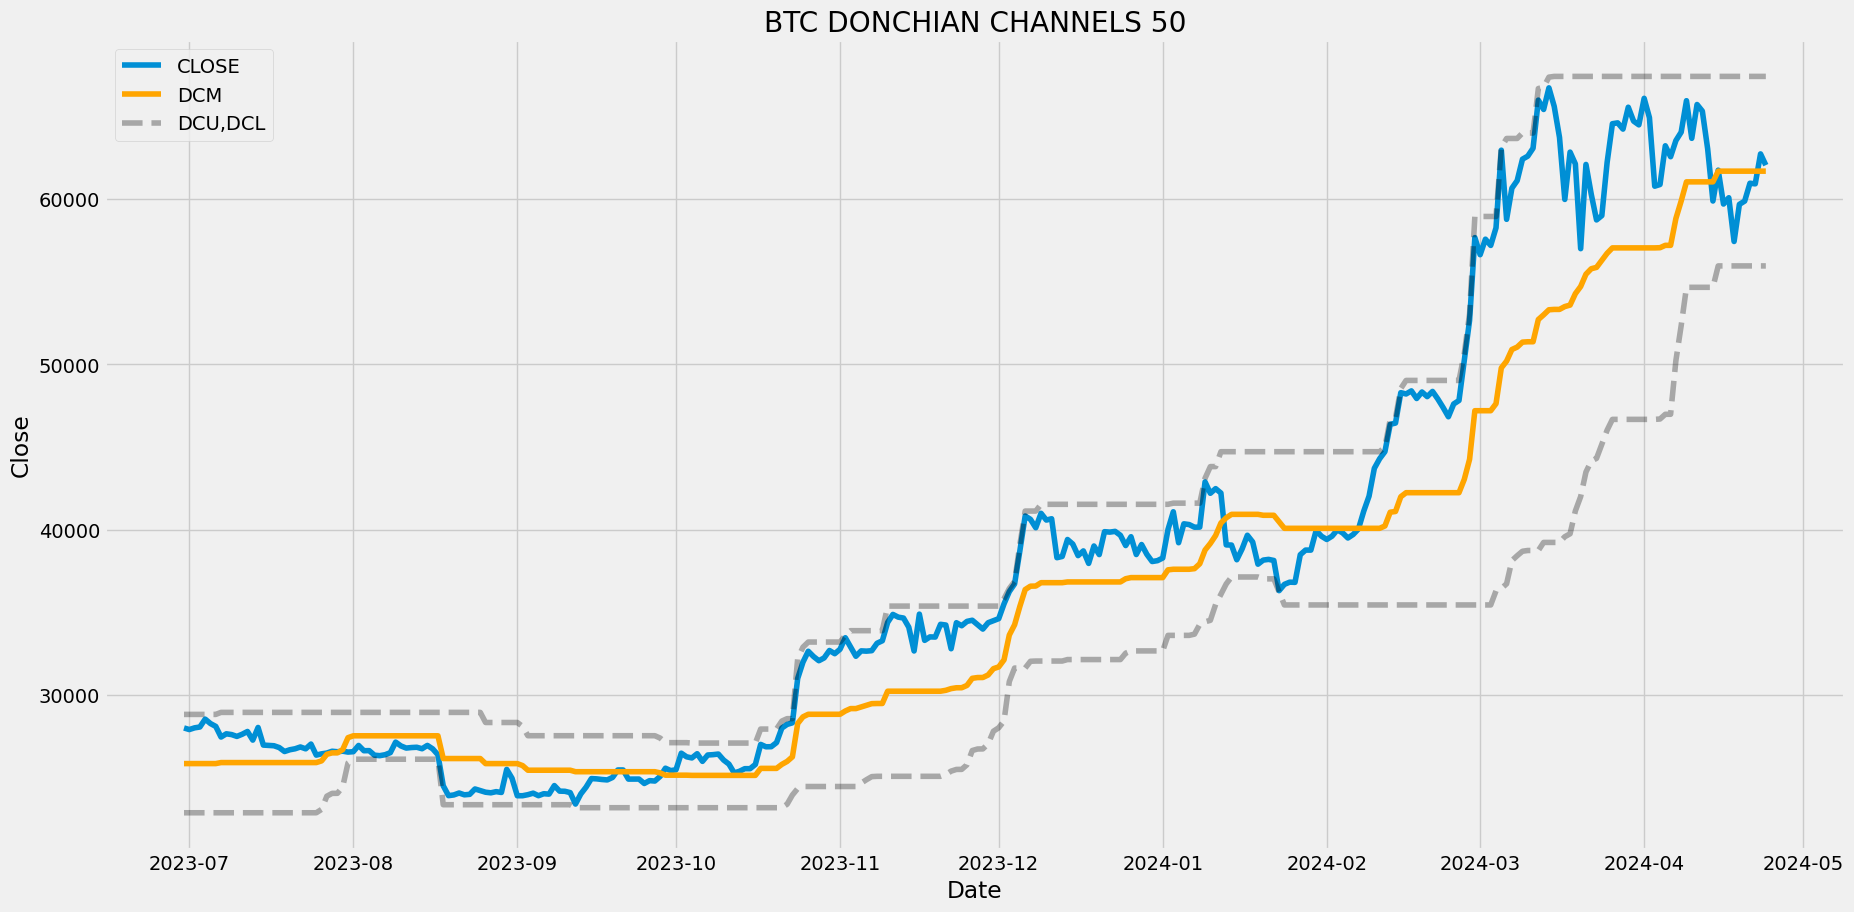

In [45]:
plt.plot(btc[-300:].close, label='CLOSE')
plt.plot(btc[-300:].dcl, color='black', linestyle='--', alpha=0.3)
plt.plot(btc[-300:].dcm, color='orange', label='DCM')
plt.plot(btc[-300:].dcu, color='black', linestyle='--', alpha=0.3, label='DCU,DCL')
plt.legend()
plt.title('BTC DONCHIAN CHANNELS 50')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()